In [2]:
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
from scipy import optimize

In [2]:
df = sns.load_dataset('diamonds')

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.drop(['depth', 'table', 'x', 'y', 'z'], axis=1, inplace=True)

In [5]:
df = pd.get_dummies(df, drop_first=True)

In [6]:
df['carat'] = np.log(1+df['carat'])
df['price'] = np.log(1+df['price'])

In [7]:
X = df.drop(columns="price")
y = df["price"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
param = {"loss": ["squared_error", "epsilon_insensitive"],
        "penalty": ["elasticnet"],
        "alpha": np.logspace(-3, 3, 10),
        "l1_ratio": np.linspace(0, 1, 10),
        "learning_rate": ["constant"],
        "eta0": np.logspace(-4, -1, 4)}

In [16]:
sgd = SGDRegressor(max_iter=1000, random_state=42)

In [17]:
grid = GridSearchCV(estimator=sgd, param_grid=param, n_jobs = -1)
%time grid.fit(X_train, y_train) 

CPU times: total: 45.1 s
Wall time: 1min 35s


GridSearchCV(estimator=SGDRegressor(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]),
                         'eta0': array([0.0001, 0.001 , 0.01  , 0.1   ]),
                         'l1_ratio': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                         'learning_rate': ['constant'],
                         'loss': ['squared_error', 'epsilon_insensitive'],
                         'penalty': ['elasticnet']})

In [19]:
grid.best_params_

{'alpha': 0.001,
 'eta0': 0.001,
 'l1_ratio': 0.0,
 'learning_rate': 'constant',
 'loss': 'epsilon_insensitive',
 'penalty': 'elasticnet'}

In [23]:
sgd_gs = SGDRegressor(**grid.best_params_, random_state=42)
sgd_gs.fit(X_train, y_train)
y_pred = sgd_gs.predict(X_test)
print(round(mean_squared_error(y_test, y_pred) ,3))


0.044


In [26]:
def func(x):
    return 6*x**5 - 5*x**4 - 4*x**3 + 3*x**2
def grad(x):
    return 30*x**4 - 20*x**3 - 12*x**2 + 6*x
    
x_cur = 0.7
y = []
x = []
i = 0
while True:
    x_new = x_cur - func(x_cur)/grad(x_cur)
    if i > 100:
        break
    x_cur = x_new
    y.append(func(x_cur))
    x.append(x_cur)
    i+=1
    print(f'iter: {i}, x: {x_cur:.3f}, y: {func(x_cur):.3f}')
    

iter: 1, x: 0.630, y: -0.001
iter: 2, x: 0.629, y: -0.000
iter: 3, x: 0.629, y: -0.000
iter: 4, x: 0.629, y: 0.000
iter: 5, x: 0.629, y: 0.000
iter: 6, x: 0.629, y: 0.000
iter: 7, x: 0.629, y: 0.000
iter: 8, x: 0.629, y: 0.000
iter: 9, x: 0.629, y: 0.000
iter: 10, x: 0.629, y: 0.000
iter: 11, x: 0.629, y: 0.000
iter: 12, x: 0.629, y: 0.000
iter: 13, x: 0.629, y: 0.000
iter: 14, x: 0.629, y: 0.000
iter: 15, x: 0.629, y: 0.000
iter: 16, x: 0.629, y: 0.000
iter: 17, x: 0.629, y: 0.000
iter: 18, x: 0.629, y: 0.000
iter: 19, x: 0.629, y: 0.000
iter: 20, x: 0.629, y: 0.000
iter: 21, x: 0.629, y: 0.000
iter: 22, x: 0.629, y: 0.000
iter: 23, x: 0.629, y: 0.000
iter: 24, x: 0.629, y: 0.000
iter: 25, x: 0.629, y: 0.000
iter: 26, x: 0.629, y: 0.000
iter: 27, x: 0.629, y: 0.000
iter: 28, x: 0.629, y: 0.000
iter: 29, x: 0.629, y: 0.000
iter: 30, x: 0.629, y: 0.000
iter: 31, x: 0.629, y: 0.000
iter: 32, x: 0.629, y: 0.000
iter: 33, x: 0.629, y: 0.000
iter: 34, x: 0.629, y: 0.000
iter: 35, x: 0.629, 

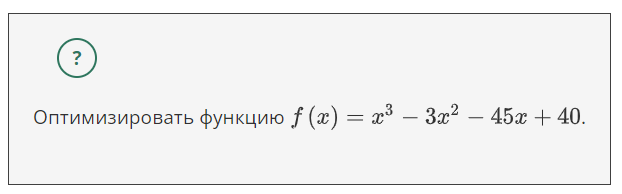

In [27]:
# метод Ньютона
def func1(x):
    return 3*x**2 - 6*x -45
def func2(x):
    return 6*x - 6

def newtons_method(f, fprime, x0, tol=0.0001):
    iter_count = 0
    x_curr = x0
    f_val = f(x_curr)
    while (abs(f_val) > tol):
        f_val = f(x_curr)
        f_prime_val = fprime(x_curr)
        x_curr = x_curr - (f_val)/(f_prime_val)
        iter_count += 1
    return x_curr

newtons_method(f=func1, fprime=func2, x0=50, tol=0.0001)

5.0

In [28]:
# метод Ньютона из библиотеки scipy
from scipy.optimize import newton
newton(func=func1, fprime=func2, x0=50, tol=0.0001)

5.0

In [31]:
def f_1(x):
    return x**3 - 72*x - 220
def f_2(x):
    return 3*x**2 - 72
newton(func=f_1, fprime=f_2, x0=12, tol=0.0001)

9.727134419408875

In [32]:
def f_3(x):
    return x**2 + 9*x - 5
def f_4(x):
    return 2*x + 9
newton(func=f_3, fprime=f_4, x0=2.2, tol=0.0001)

0.5249378105607477

In [34]:
def f_5(x):
    return 8*x**3 - 2*x**2 - 450
def f_6(x):
    return 24*x**2 - 4*x
def f_7(x):
    return 48*x - 4
newton(func=f_6, fprime=f_7, x0=42, tol=0.0001)

0.1666666807529666

In [3]:
from scipy.optimize import minimize

In [8]:
# квазиньютоновские методы
def func(x):
    return x[0]**2 - x[0]*x[1] + x[1]**2 + 9*x[0] - 6*x[1] + 20

def grad_func(x):
    return np.array([2*x[0] - x[1] + 9, -x[0] + 2*x[1] - 6])

x_0 = [-400.0, -400.0]

result = minimize(func, x_0, method='BFGS', jac=grad_func)
print('Статус оптимизации %s' % result['message'])
print('Количество оценок: %d' % result['nfev'])
solution = result['x']
evaluation = func(solution)
print('Решение: f(%s) = %.5f' % (solution, evaluation))

Статус оптимизации Optimization terminated successfully.
Количество оценок: 11
Решение: f([-4.  1.]) = -1.00000


In [11]:
# квазиньютоновские методы
def func(x):
    return x**2 - 3*x + 45

def grad_func(x):
    return 2*x - 3

x_0 = 10

result = minimize(func, x_0, method='BFGS', jac=grad_func)
print('Статус оптимизации %s' % result['message'])
print('Количество оценок: %d' % result['nfev'])
solution = result['x']
evaluation = func(solution)
print('Решение: f(%s) = %.5f' % (solution, evaluation))

Статус оптимизации Optimization terminated successfully.
Количество оценок: 5
Решение: f([1.5]) = 42.75000


C:\Users\vadim.kopytko\AppData\Local\Temp\ipykernel_21044\1951585393.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Решение: f(%s) = %.5f' % (solution, evaluation))


In [12]:
result_b = minimize(func, x_0, method='L-BFGS-B', jac=grad_func)
print('Статус оптимизации %s' % result_b['message'])
print('Количество оценок: %d' % result_b['nfev'])
solution_b = result_b['x']
evaluation_b = func(solution_b)
print('Решение: f(%s) = %.5f' % (solution_b, evaluation_b))

Статус оптимизации CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
Количество оценок: 3
Решение: f([1.5]) = 42.75000


C:\Users\vadim.kopytko\AppData\Local\Temp\ipykernel_21044\242266385.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Решение: f(%s) = %.5f' % (solution_b, evaluation_b))


In [16]:
def func(x):
    return x[0]**4 + 6*x[1]**2 + 10

def grad_func(x):
    return np.array([4*x[0]**3, 12*x[1]])

x_0 = [100, 100]

result = minimize(func, x_0, method='BFGS', jac=grad_func)
print('Статус оптимизации %s' % result['message'])
print('Количество оценок: %d' % result['nfev'])
solution = result['x']
evaluation = func(solution)
print('Решение: f(%s) = %.5f' % (solution, evaluation))

result_b = minimize(func, x_0, method='L-BFGS-B', jac=grad_func)
print('Статус оптимизации %s' % result_b['message'])
print('Количество оценок: %d' % result_b['nfev'])
solution_b = result_b['x']
evaluation_b = func(solution_b)
print('Решение: f(%s) = %.5f' % (solution_b, evaluation_b))

Статус оптимизации Optimization terminated successfully.
Количество оценок: 37
Решение: f([1.31617159e-02 6.65344582e-14]) = 10.00000
Статус оптимизации CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
Количество оценок: 40
Решение: f([-9.52718297e-03 -2.32170510e-06]) = 10.00000


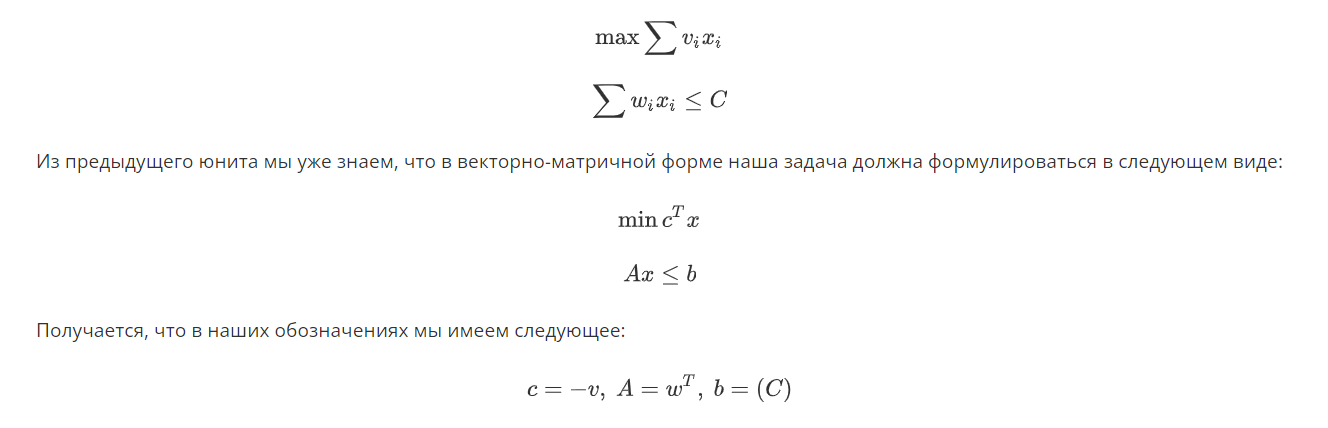

In [17]:
# линейное программирование

values = [4, 2, 1, 7, 3, 6] #стоимости товаров
weights = [5, 9, 8, 2, 6, 5] #вес товаров
C = 15 #вместимость сумки
n = 6 #количество товаров

In [20]:
c = - np.array(values) #изменяем знак, чтобы перейти от задачи максимизации к задаче минимизации
A = np.array(weights)  #конвертируем список с весами в массив
A = np.expand_dims(A, 0) #преобразуем размерность массива
b = np.array([C]) #конвертируем вместимость в массив

In [21]:
from scipy.optimize import linprog
linprog(c=c, A_ub=A, b_ub=b)

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -52.5
              x: [ 0.000e+00  0.000e+00  0.000e+00  7.500e+00  0.000e+00
                   0.000e+00]
            nit: 0
          lower:  residual: [ 0.000e+00  0.000e+00  0.000e+00  7.500e+00
                              0.000e+00  0.000e+00]
                 marginals: [ 1.350e+01  2.950e+01  2.700e+01  0.000e+00
                              1.800e+01  1.150e+01]
          upper:  residual: [       inf        inf        inf        inf
                                    inf        inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00
                              0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00]
                 marginals: [-3.500e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

In [22]:
import cvxpy

In [23]:
x = cvxpy.Variable(shape=n, integer = True)

In [32]:
A = A.flatten() # Преобразуем размерность массива
constraint = cvxpy.sum(cvxpy.multiply(A, x)) <= C
total_value = cvxpy.sum(cvxpy.multiply(x, c))
x_positive = x >= 0

In [35]:
problem = cvxpy.Problem(cvxpy.Minimize(total_value), constraints=[constraint, x_positive])
print(problem.solve())
print(x.value)

-49.0
[-0. -0. -0.  7. -0.  0.]


In [36]:
# А что если мы можем брать не любое количество товаров, а только один или не брать их вовсе
x = cvxpy.Variable(shape=n, boolean=True)
constraint = cvxpy.sum(cvxpy.multiply(A, x)) <= C
x_positive = x >= 0
total_value = cvxpy.sum(cvxpy.multiply(x, c))

problem = cvxpy.Problem(
    cvxpy.Minimize(total_value), constraints=[constraint, x_positive]
)

print(problem.solve())
print(x.value)

-17.0
[1. 0. 0. 1. 0. 1.]


In [37]:
from pulp import *

problem = LpProblem('Производство машин', LpMaximize)
A = LpVariable('Автомобиль A', lowBound=0 , cat=LpInteger)
B = LpVariable('Автомобиль B', lowBound=0 , cat=LpInteger)
#Целевая функция
problem += 20000*A + 45000*B 
#Ограничения
problem += 4*A + 5*B <= 30 
problem += 3*A + 6*B <=30
problem += 2*A + 7*B <=30
problem.solve()
print("Количество автомобилей модели А: ", A.varValue)
print("Количество автомобилей модели В: ", B.varValue)
print("Суммарный доход: ", value(problem.objective))

C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\pulp\pulp.py:1316: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


Количество автомобилей модели А:  1.0
Количество автомобилей модели В:  4.0
Суммарный доход:  200000.0
